# Project 1 

### Discovery of data 
Data source: https://data.baltimorecity.gov/ I downloaded these data from the link provided in black board 

# CREATING DATA FRAME

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("Part_1_Crime_Data.csv")


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39529 entries, 0 to 39528
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                39509 non-null  float64
 1   Y                39509 non-null  float64
 2   RowID            39529 non-null  int64  
 3   CCNumber         39529 non-null  object 
 4   CrimeDateTime    39529 non-null  object 
 5   CrimeCode        39529 non-null  object 
 6   Description      39529 non-null  object 
 7   Inside_Outside   34025 non-null  object 
 8   Weapon           39364 non-null  object 
 9   Post             39086 non-null  float64
 10  Gender           36713 non-null  object 
 11  Age              36771 non-null  float64
 12  Race             39222 non-null  object 
 13  Ethnicity        5322 non-null   object 
 14  Location         39298 non-null  object 
 15  Old_District     39086 non-null  object 
 16  New_District     0 non-null      float64
 17  Neighborhood

Using .info() got to know more about data like dtype and null factors. Through these it is evident that the new district is the null column with zero entries. so cleaning is required for future analysis.

# Cleaning 

In [115]:
filter_df = df.dropna(axis = 1, how = 'all')

In [116]:
filter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39529 entries, 0 to 39528
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   X                39509 non-null  float64
 1   Y                39509 non-null  float64
 2   RowID            39529 non-null  int64  
 3   CCNumber         39529 non-null  object 
 4   CrimeDateTime    39529 non-null  object 
 5   CrimeCode        39529 non-null  object 
 6   Description      39529 non-null  object 
 7   Inside_Outside   34025 non-null  object 
 8   Weapon           39364 non-null  object 
 9   Post             39086 non-null  float64
 10  Gender           36713 non-null  object 
 11  Age              36771 non-null  float64
 12  Race             39222 non-null  object 
 13  Ethnicity        5322 non-null   object 
 14  Location         39298 non-null  object 
 15  Old_District     39086 non-null  object 
 16  Neighborhood     39043 non-null  object 
 17  Latitude    

## Difference in Crime rates (2017-2022)

In [117]:
filter_df['CrimeDateTime'] = pd.to_datetime(filter_df['CrimeDateTime'])


filter_df['year'] = filter_df['CrimeDateTime'].dt.year


# Filtering the Data frame
filter_df_2017 = filter_df[filter_df['year'] == 2017]
filter_df_2022 = filter_df[filter_df['year'] == 2022]


c_2017 = len(filter_df_2017)
c_2022 = len(filter_df_2022)


difference = c_2022 - c_2017
print(f"Count difference between 2017 and 2022: {difference}")

Count difference between 2017 and 2022: -449


<ipython-input-117-c6bcd4e97e7d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_df['CrimeDateTime'] = pd.to_datetime(filter_df['CrimeDateTime'])


## The percentage change in the crime rate between 2017 and 2022

In [118]:
percentage = ((c_2022 - c_2017) / c_2017) * 100
print(percentage)

-6.49876972065422


### Extracting year from 'CrimeDateTime' column and adding a new column 'Year' to hold the values 

In [119]:
filter_df['CrimeDateTime'] = pd.to_datetime(filter_df['CrimeDateTime'])

filter_df['Year'] = filter_df['CrimeDateTime'].dt.year

#Converting an object to the string datatype
filter_df['Neighborhood'] = filter_df['Neighborhood'].astype(str)

In [120]:
summary = filter_df.groupby(['Neighborhood', 'Year'])['Total_Incidents'].sum().reset_index()

In [121]:
summary.head(15)

,Neighborhood,Year,Total_Incidents
0,ABELL,2017,12
1,ABELL,2018,13
2,ABELL,2019,10
3,ABELL,2020,7
4,ABELL,2021,7
5,ABELL,2022,13
6,ALLENDALE,2017,48
7,ALLENDALE,2018,56
8,ALLENDALE,2019,48
9,ALLENDALE,2020,24


### A line graph showing Baltimore City's crime rate from 2017 to 2022

Total Change in Percentage: -6.50%


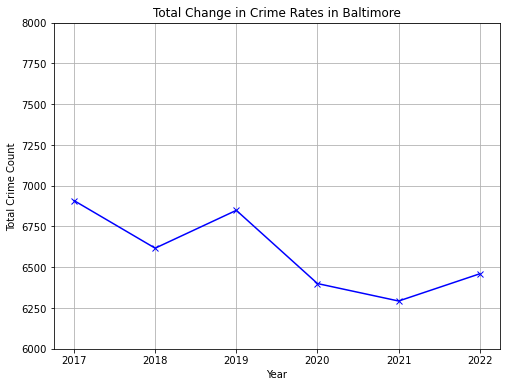

In [122]:

# Filtering the  data for 2017-2022 and crime types
start = 2017
end = 2022
type_crime = ['HOMICIDE', 'SHOOTING', 'AGG. ASSAULT']

filter_df = filter_df[(filter_df['Year'] >= start) & (filter_df['Year'] <= end) &
                           filter_df['Description'].isin(type_crime)].reset_index(drop=True)



# Calculating total change in crime rates 
overall = filter_df.groupby('Year').size().reset_index(name='Total_Incidents')
overall_2017 = overall['Total_Incidents'].iloc[0]
overall_2022 = overall['Total_Incidents'].iloc[-1]
total_percentage = ((overall_2022 - overall_2017) / overall_2017) * 100



print(f"Total Change in Percentage: {total_percentage:.2f}%")


plt.figure(figsize=(8, 6))
plt.plot(overall['Year'], overall['Total_Incidents'], marker='x', color='blue')
plt.ylim(6000, 8000)
plt.title('Total Change in Crime Rates in Baltimore')
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.grid(True)
plt.show()


In [123]:
overall.head(10)

,Year,Total_Incidents
0,2017,6909
1,2018,6617
2,2019,6849
3,2020,6400
4,2021,6293
5,2022,6460


### Crime rate counts in neighborhoods

In [124]:
count_nbh = filter_df['Neighborhood'].value_counts()
print(count_nbh)


DOWNTOWN               1167
SANDTOWN-WINCHESTER     975
FRANKFORD               942
BROOKLYN                935
BELAIR-EDISON           910
                       ... 
Saint Josephs             1
Sandtown-Winchester       1
PORT COVINGTON            1
Rognel Heights            1
LOYOLA/NOTRE DAME         1
Name: Neighborhood, Length: 279, dtype: int64


In [125]:
count_nbh = filter_df['Neighborhood'].nunique()
print(count_nbh)

279


##  Bar graph of top five crime rate neighborhoods

In [126]:
top_five = filter_df.Neighborhood.value_counts().sort_values(ascending=False).head(5)
top_five

DOWNTOWN               1167
SANDTOWN-WINCHESTER     975
FRANKFORD               942
BROOKLYN                935
BELAIR-EDISON           910
Name: Neighborhood, dtype: int64

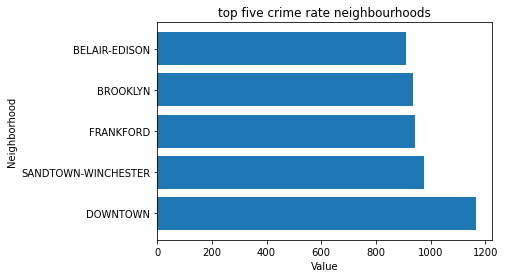

In [127]:
plt.barh(top_five.index, top_five.values)
plt.xlabel('Value')
plt.ylabel('Neighborhood')
plt.title('top five crime rate neighbourhoods')
plt.show()

##  Bar plot for visualizing bottom five crime rate neighborhoods of baltimore city 

In [128]:
bottom_five = filter_df.Neighborhood.value_counts().sort_values().head(5)
bottom_five

LOYOLA/NOTRE DAME    1
Woodmere             1
LAKE EVESHAM         1
Millhill             1
Rognel Heights       1
Name: Neighborhood, dtype: int64

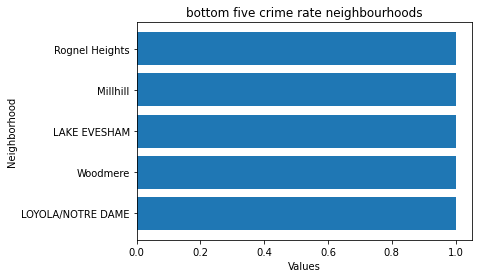

In [129]:
plt.barh(bottom_five.index, bottom_five.values)
plt.xlabel('Values')
plt.ylabel('Neighborhood')
plt.title('bottom five crime rate neighbourhoods')
plt.show()

In [130]:
filter_top5 = df[df['Neighborhood'].isin(top_five.index)]
filter_bottom5 = df[df['Neighborhood'].isin(bottom_five.index)]
print("Filtered Data of Top 5 Neighborhoods:")
print(filter_top5.head())
print("\nFiltered Data of Bottom 5 Neighborhoods:")
print(filter_bottom5.head())


Filtered Data of Top 5 Neighborhoods:
            X          Y  RowID  CCNumber           CrimeDateTime CrimeCode  \
16 -76.614717  39.293586    751  20E02651  2020/05/10 12:10:00+00        4B   
21 -76.615116  39.290425    874  20E02726  2020/05/10 16:00:00+00        4B   
33 -76.615512  39.253245   1385  19H02689  2019/08/08 00:18:00+00        9S   
43 -76.613723  39.287988   2268  18J00463  2018/10/02 03:40:00+00        4C   
49 -76.597105  39.227929   2429  18G05156  2018/07/14 20:00:00+00        4B   

     Description Inside_Outside   Weapon   Post  ... Ethnicity  \
16  AGG. ASSAULT              O    KNIFE  111.0  ...       NaN   
21  AGG. ASSAULT            NaN    KNIFE  114.0  ...       NaN   
33      SHOOTING        Outside  FIREARM  913.0  ...       NaN   
43  AGG. ASSAULT            NaN    OTHER  111.0  ...       NaN   
49  AGG. ASSAULT              O    KNIFE  913.0  ...       NaN   

             Location Old_District New_District Neighborhood   Latitude  \
16    0 E PLEAS

In [131]:
filter_top5.loc[:, 'Year'] = pd.to_datetime(filter_top5['CrimeDateTime']).dt.year
filter_bottom5.loc[:, 'Year'] = pd.to_datetime(filter_bottom5['CrimeDateTime']).dt.year
pivot_top5 = filter_top5.pivot_table(index='Neighborhood', columns='Year', aggfunc='size', fill_value=0)
pivot_bottom5 = filter_bottom5.pivot_table(index='Neighborhood', columns='Year', aggfunc='size', fill_value=0)
print("Top 5 Neighborhoods --- Counts by Year:")
print(pivot_top5)
print("\nBottom 5 Neighborhoods --- Counts by Year:")
print(pivot_bottom5)



Top 5 Neighborhoods --- Counts by Year:
Year                 2017  2018  2019  2020  2021  2022
Neighborhood                                           
BELAIR-EDISON         163   141   156   152   137   161
BROOKLYN              226   137   163   139   121   149
DOWNTOWN              158   207   211   187   194   210
FRANKFORD             121   147   166   169   145   194
SANDTOWN-WINCHESTER   207   155   147   171   145   150

Bottom 5 Neighborhoods --- Counts by Year:
Year               2017  2020  2021
Neighborhood                       
LAKE EVESHAM          0     1     0
LOYOLA/NOTRE DAME     1     0     0
Millhill              0     1     0
Rognel Heights        0     0     1
Woodmere              0     0     1


C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\HP\anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


##  Line graph of top and bottom five crime rate neighborhoods of baltimore city (2017-2022)

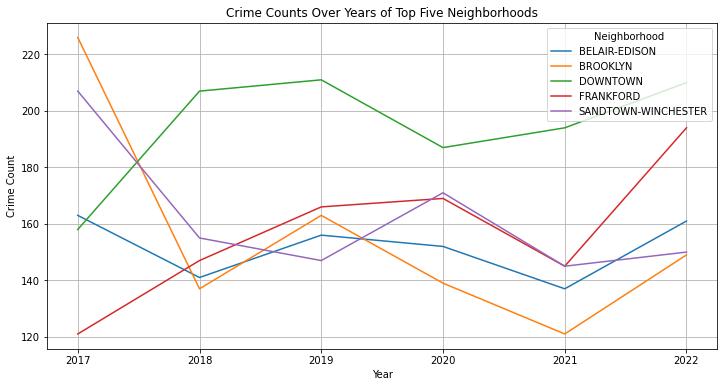

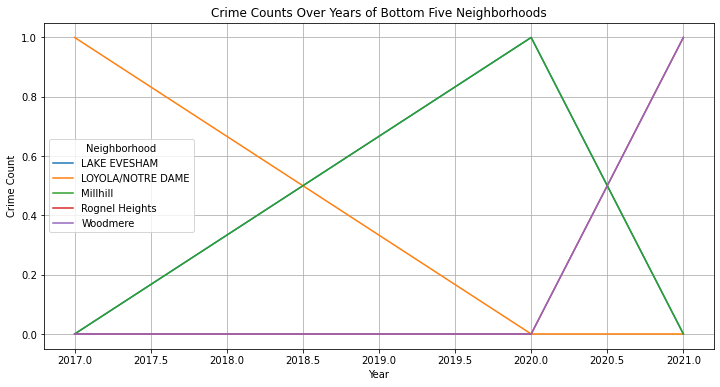

In [132]:
def plot_neighborhood_counts(pivot_table, title):
    plt.figure(figsize=(12, 6))
    for neighborhood in pivot_table.index:
        plt.plot(pivot_table.columns, pivot_table.loc[neighborhood], label=neighborhood)

    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Crime Count')
    plt.legend(title='Neighborhood')
    plt.grid(True)
    plt.show()

plot_neighborhood_counts(pivot_top5, 'Crime Counts Over Years of Top Five Neighborhoods')

plot_neighborhood_counts(pivot_bottom5, 'Crime Counts Over Years of Bottom Five Neighborhoods')
